# What impacts video game sales?

**Project Goal and Description**
The online store Ice sells video games all over the world and is planning an ad campaign for 2017. The goal of this project is to determine what factors influence the success of particular games. Potential factors include expert reviews, user reviews, genres, platforms and regions. 

**Project Plan**
This project will entail the following:
* Preparing the data for analysis, including checking for missing values, duplicates, appropriate data types, and conduct initial calculations (ex. total sales)
* Analyze data to get an initial view of game performance, including the number of games released in different years, sales across games and genre, sales across platforms, and sale performance over time.
* Determine sale performance, top platforms and top genres across regions. 
* Test the following hypotheses: 
    * Average user ratings of the Xbox One and PC platforms are the same.
    * Average user ratings for the Action and Sports genres are different.


## Initialization 

In [1]:
# Loads all the libraries needed for analysis 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from scipy import stats as st
import sys
import warnings
if not sys.warnoptions:
        warnings.simplefilter("ignore");  
from matplotlib.axes._axes import _log as matplotlib_axes_logger
matplotlib_axes_logger.setLevel('ERROR')

## Load data 

In [2]:
# Loads the data files into DataFrames
game_data = pd.read_csv('/datasets/games.csv')

## Prepare data

This is a summary of how the data was prepared for analysis, as executed below: 

* **Duplicates**: 
    * There are no duplicate rows in the dataframe.
    * There were no implicit duplicates that needed to be fixed within the columns. 
* **Column Names**: The column names were changed to all lower case letters to be easier to read and analyze.
* **Data Types**: 
    * The datatypes were changed for year of release (to float) and user score (to float). 
    * 14% of rows in the user score column are marked as "tbd". These rows have a similar distribution of data as the rest of the data set, including across years. My hypothesis is that these are games that are not yet rated, I replaced 'tbd' with an empty string, so that I could convert this column to a float type.
* **Missing Data** 
    * Rows with missing data in name, genre (only two rows) and year of release (1.6% of rows) were dropped. These rows were evenly distributed throughout the data and removing them did not impact the analysis. I took a look at the rows with missing data to identify any patterns, but the rows were evenly distributed throughout the data, indicating that they were most likely null due to input error. 
    * Missing data in the critic score and user score columns was filled in the with the median scores according to platform and genre.
    * Missing data in the ratings column was replaced with 'not rated'.
* **Adding Total Sales**
    * Total sales across all regions per game was added to the table.


### Gather initial view of the data

In [3]:
# Print the general/summary information about the data

game_data.shape

game_data.info()

game_data.isnull().sum()

game_data.isnull().sum() / len(game_data) * 100

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Name                0.011965
Platform            0.000000
Year_of_Release     1.609333
Genre               0.011965
NA_sales            0.000000
EU_sales            0.000000
JP_sales            0.000000
Other_sales         0.000000
Critic_Score       51.319174
User_Score         40.089740
Rating             40.478612
dtype: float64

In [4]:
# Print a sample of data for plans

game_data.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [5]:
# Get summary of descriptive stats 

game_data.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


### Change column names to lower case 

In [6]:
# Change column names to lower case

game_data.columns= game_data.columns.str.lower()

game_data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


### Check of duplicate rows 

In [7]:
game_data.duplicated().sum()

0

### Clean up data in specific columns

#### Platform

In [8]:
# Determine unique values

sorted(game_data.platform.unique())

['2600',
 '3DO',
 '3DS',
 'DC',
 'DS',
 'GB',
 'GBA',
 'GC',
 'GEN',
 'GG',
 'N64',
 'NES',
 'NG',
 'PC',
 'PCFX',
 'PS',
 'PS2',
 'PS3',
 'PS4',
 'PSP',
 'PSV',
 'SAT',
 'SCD',
 'SNES',
 'TG16',
 'WS',
 'Wii',
 'WiiU',
 'X360',
 'XB',
 'XOne']

In [9]:
# Create platform categories 

def platform(row): # Creates a function that replaces the values in the column condition with values 
    platform = row['platform']
    if 'PC' in platform:
        return 'PC'
    elif '3D' in platform:
        return '3D'
    elif 'PC' in platform:
        return 'PC'
    elif 'PS' in platform:
        return 'PS'
    elif 'GB' in platform:
        return 'GB'
    elif 'X' in platform:
        return 'XBox'
    elif 'DS' in platform:
        return 'DS'
    elif 'Wii' in platform:
        return 'Wii'
    else:
        return platform

In [10]:
# Tests the function

row_values = ['XPS'] # Creates a list that indicates row value
row_columns = ['platform'] # Creates list that indicates column name

row = pd.Series(data=row_values, index=row_columns) # Creates a new row with the above values

print(platform(row)) # Passes the row through the function


PS


In [11]:
# Pass the function
game_data['platform_cat'] = game_data.apply(platform, axis=1)

In [12]:
# Make sure platform category was added 

game_data.head()

game_data['platform_cat'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'XBox', 'PS', 'SNES', '3D', 'N64', 'PC',
       '2600', 'GC', 'GEN', 'DC', 'SAT', 'SCD', 'WS', 'NG', 'TG16', 'GG'],
      dtype=object)

In [13]:
# Trying out the use of np.where function 

# game_data['platform_cat2'] = np.where('PC' in game_data['platform'], 'PC', np.where('3D' in game_data['platform'], '3D', 'Other'))

# game_data.head()


#### Name and genre

* There are two rows that are missing both the name and the genre. Without the ability to know how to fill in these missing data, I dropped these columns. Since it is only two rows, it will not impact our analysis. 

In [14]:
# Determine unique values

game_data.name.unique()

array(['Wii Sports', 'Super Mario Bros.', 'Mario Kart Wii', ...,
       'Woody Woodpecker in Crazy Castle 5', 'LMA Manager 2007',
       'Haitaka no Psychedelica'], dtype=object)

In [15]:
# Determine unique values

game_data.genre.unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy', nan], dtype=object)

In [16]:
# Pull out rows where there is missing data in the column 'name'

game_name_na = game_data.loc[game_data['name'].isna()]

game_name_na

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,platform_cat
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN,GEN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN,GEN


In [17]:
# Drop rows where there is missing data in 'name'

game_data.dropna(subset = ['name'], inplace = True)

game_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
 11  platform_cat     16713 non-null  object 
dtypes: float64(6), object(6)
memory usage: 1.7+ MB


#### Year of release

* I first convert Year of Release column to a datetime object.
* Rows that have missing data in the Year of Release column was similar to the data for the overall dataframe.
* Missing data only represents 1.6% of data, therefore I drop the rows with missing data in "Year of Release". 

In [18]:
# Convert year_of_release to a datetime object 

#game_data['year_of_release'] = pd.to_datetime(game_data['year_of_release'], format='%Y')

#game_data['year_of_release'] = game_data['year_of_release'].astype(float)

game_data['year_of_release'] = pd.to_numeric(game_data['year_of_release'])

game_data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
 11  platform_cat     16713 non-null  object 
dtypes: float64(6), object(6)
memory usage: 1.7+ MB


In [19]:
# Pull out rows where there is missing data in the column 'year of release'

game_year_na = game_data.loc[game_data['year_of_release'].isna()]

game_year_na

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,platform_cat
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E,PS
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E,PS
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+,Wii
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN,PS
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN,2600
...,...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,tbd,E10+,PS
16405,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T,GC
16448,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M,PC
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN,PS


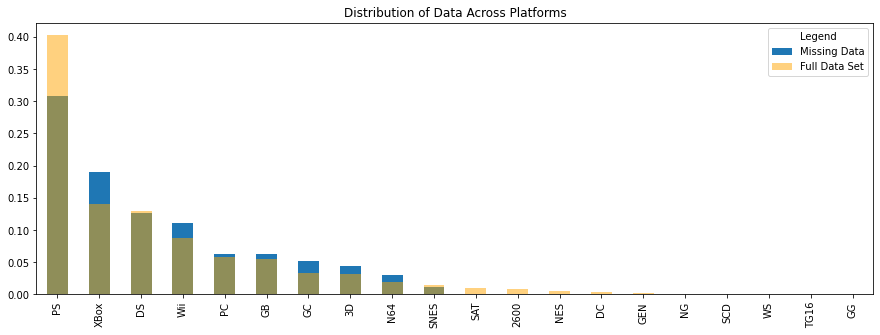

In [20]:
# Check the distribution of platform between missing data and whole data set

game_year_na['platform_cat'].value_counts(normalize=True).plot(kind='bar', figsize=(15,5));

game_data['platform_cat'].value_counts(normalize=True).plot(kind='bar', color='orange', figsize=(15,5), alpha=0.5);

legend = plt.legend(['Missing Data','Full Data Set'], title = 'Legend')
plt.title("Distribution of Data Across Platforms");


**Interpretation of Graph**
The distribution of data is the same for missing data vs the whole dataset.

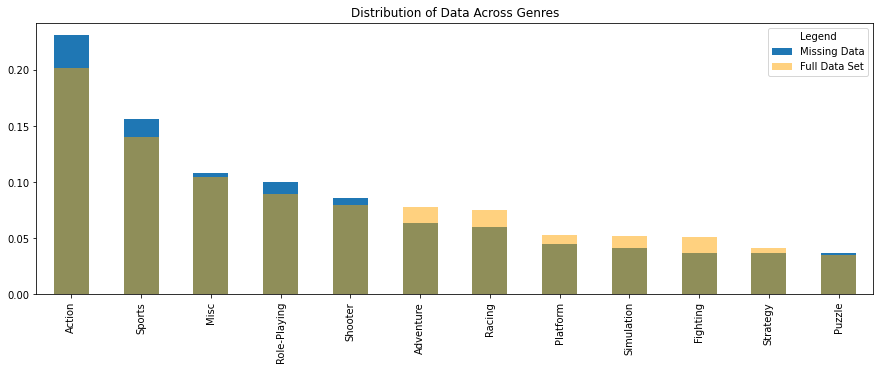

In [21]:
# Check the distribution of genre between missing data and whole data set

game_year_na['genre'].value_counts(normalize=True).plot(kind='bar', figsize=(15,5));

game_data['genre'].value_counts(normalize=True).plot(kind='bar', color='orange', figsize=(15,5), alpha=0.5);

legend = plt.legend(['Missing Data','Full Data Set'], title = 'Legend')
plt.title("Distribution of Data Across Genres");

**Interpretation of Graph**
The distribution of data is the same for missing data vs the whole dataset.

In [22]:
game_data.describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score
count,16444.000000,16713.000000,16713.000000,16713.000000,16713.000000,8137.000000
mean,2006.486256,0.263302,0.145045,0.077625,0.047343,68.967679
std,5.875525,0.813565,0.503359,0.308871,0.186742,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


In [23]:
game_year_na.describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score
count,0.0,269.000000,269.000000,269.000000,269.000000,154.000000
mean,NaN,0.219888,0.090929,0.024907,0.032007,67.584416
std,NaN,0.424907,0.207933,0.090160,0.075546,14.828740
min,NaN,0.000000,0.000000,0.000000,0.000000,22.000000
25%,NaN,0.010000,0.000000,0.000000,0.000000,57.000000
50%,NaN,0.090000,0.020000,0.000000,0.010000,70.000000
75%,NaN,0.240000,0.100000,0.000000,0.030000,78.000000
max,NaN,4.260000,2.360000,0.770000,0.710000,94.000000


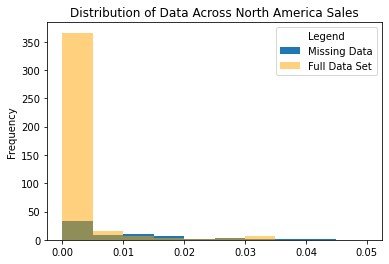

In [24]:
# Check the distribution of regional sales between missing data and whole data set

game_year_na['na_sales'].value_counts(normalize=True).plot(kind='hist', bins=10, range=(0,0.05));

game_data['na_sales'].value_counts(normalize=True).plot(kind='hist', color='orange', bins=10, alpha=0.5, range=(0,0.05));

legend = plt.legend(['Missing Data','Full Data Set'], title = 'Legend')
plt.title("Distribution of Data Across North America Sales");

**Interpretation of Graph**
The distribution of data is the same for missing data vs the whole dataset.

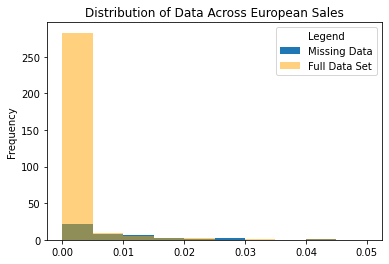

In [25]:
# Check the distribution of regional sales between missing data and whole data set

game_year_na['eu_sales'].value_counts(normalize=True).plot(kind='hist', bins=10, range=(0,0.05));

game_data['eu_sales'].value_counts(normalize=True).plot(kind='hist', color='orange', bins=10, alpha=0.5, range=(0,0.05));

legend = plt.legend(['Missing Data','Full Data Set'], title = 'Legend')
plt.title("Distribution of Data Across European Sales");

**Interpretation of Graph**
The distribution of data is the same for missing data vs the whole dataset.

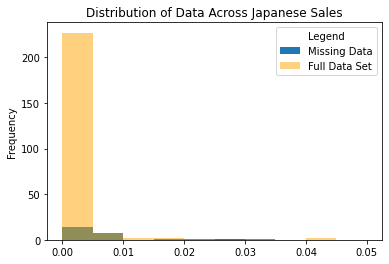

In [26]:
# Check the distribution of regional sales between missing data and whole data set

game_year_na['jp_sales'].value_counts(normalize=True).plot(kind='hist', bins=10, range=(0,0.05));

game_data['jp_sales'].value_counts(normalize=True).plot(kind='hist', color='orange', bins=10, alpha=0.5, range=(0,0.05));

legend = plt.legend(['Missing Data','Full Data Set'], title = 'Legend')
plt.title("Distribution of Data Across Japanese Sales");

**Interpretation of Graph**
The distribution of data is the same for missing data vs the whole dataset.'Missing Data',

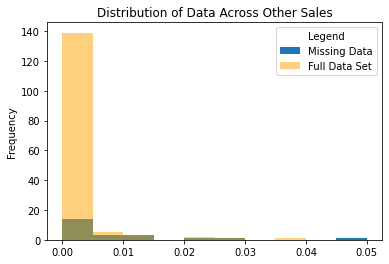

In [27]:
# Check the distribution of regional sales between missing data and whole data set

game_year_na['other_sales'].value_counts(normalize=True).plot(kind='hist', bins=10, range=(0,0.05));

game_data['other_sales'].value_counts(normalize=True).plot(kind='hist', color='orange', bins=10, alpha=0.5, range=(0,0.05));

legend = plt.legend(['Missing Data','Full Data Set'], title = 'Legend')
plt.title("Distribution of Data Across Other Sales");

**Interpretation of Graph**
The distribution of data is the same for missing data vs the whole dataset.

In [28]:
game_data.dropna(subset = ['year_of_release'], inplace = True)

game_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       9839 non-null   object 
 10  rating           9768 non-null   object 
 11  platform_cat     16444 non-null  object 
dtypes: float64(6), object(6)
memory usage: 1.6+ MB


In [29]:
# df.isna().sum()

# df.isna().sum() / len(df) * 100

# df[‘column’].unique()

# df_na= df.loc[df[‘column’].isna()]

# df[‘column’] = df[‘column'].fillna(0)

#### Critic score

In [30]:
# Pull out rows where there is missing data in the column 'critic score'

game_critic_na = game_data.loc[game_data['critic_score'].isna()]

game_critic_na

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,platform_cat
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,NES
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,GB
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN,GB
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN,NES
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN,DS
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,PS
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN,XBox
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,PS
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN,GB


In [31]:
# Fills in the missing data with the median for the game's platform and genre. For the platforms/genres that only had missing data, this fills in the median for overall critic scores.

game_data['critic_score'] = (game_data.groupby(['platform_cat','genre'])['critic_score'].transform(lambda x: x.fillna(x.median()))).fillna(game_data['critic_score'].median())

game_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     16444 non-null  float64
 9   user_score       9839 non-null   object 
 10  rating           9768 non-null   object 
 11  platform_cat     16444 non-null  object 
dtypes: float64(6), object(6)
memory usage: 1.6+ MB


#### User score

In [32]:
# Locate rows that have 'TBD'

game_user_tbd = game_data.loc[game_data['user_score'] == 'tbd']

game_user_tbd.shape


(2376, 12)

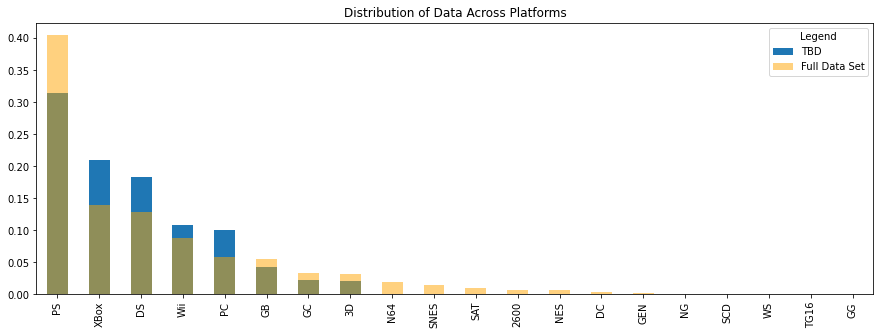

In [33]:
# Check the distribution of platform between user_score rows with tbd and whole data set

game_user_tbd['platform_cat'].value_counts(normalize=True).plot(kind='bar', figsize=(15,5));

game_data['platform_cat'].value_counts(normalize=True).plot(kind='bar', color='orange', figsize=(15,5), alpha=0.5);

legend = plt.legend(['TBD','Full Data Set'], title = 'Legend')
plt.title("Distribution of Data Across Platforms");

**Interpretation of Graph**
The distribution of data is the same for missing data vs the whole dataset.

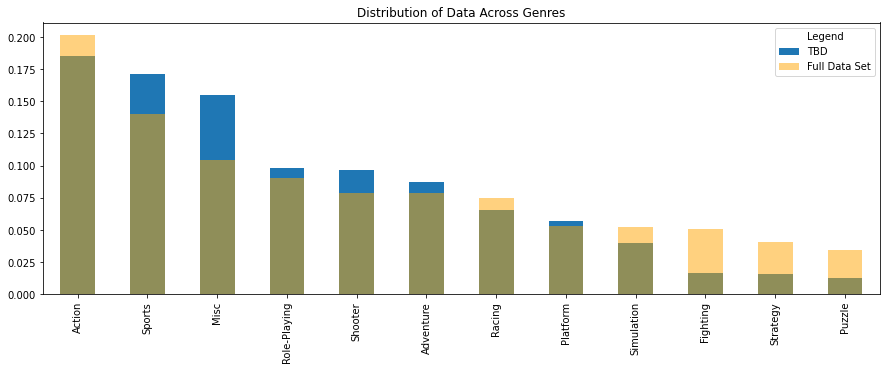

In [34]:
# Check the distribution of genre between user_score rows with tbd and whole data set

game_user_tbd['genre'].value_counts(normalize=True).plot(kind='bar', figsize=(15,5));

game_data['genre'].value_counts(normalize=True).plot(kind='bar', color='orange', figsize=(15,5), alpha=0.5);

legend = plt.legend(['TBD','Full Data Set'], title = 'Legend')
plt.title("Distribution of Data Across Genres");

**Interpretation of Graph**
The distribution of data is the same for missing data vs the whole dataset.

In [35]:
# Looks at descriptive statistics for only rows that have 'tbd' in the user_score column

game_user_tbd.describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score
count,2376.000000,2376.000000,2376.000000,2376.000000,2376.000000,2376.000000
mean,2007.450337,0.125539,0.043674,0.002782,0.015905,64.246843
std,3.484229,0.176593,0.112068,0.026395,0.039411,8.818592
min,1997.000000,0.000000,0.000000,0.000000,0.000000,23.000000
25%,2005.000000,0.030000,0.000000,0.000000,0.000000,61.000000
50%,2008.000000,0.070000,0.010000,0.000000,0.010000,65.500000
75%,2010.000000,0.150000,0.040000,0.000000,0.020000,69.000000
max,2016.000000,3.450000,2.590000,0.860000,1.090000,90.000000


In [36]:
# Looks at descriptive statistics for the data overall to compare

game_data.describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score
count,16444.000000,16444.000000,16444.000000,16444.000000,16444.000000,16444.000000
mean,2006.486256,0.264012,0.145930,0.078487,0.047594,69.135673
std,5.875525,0.818378,0.506716,0.311100,0.188005,10.256025
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,65.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,70.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,74.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


In [37]:
# Replaces 'tbd' with an empty string so that user_score can be converted to a float type

game_data['user_score'].replace('tbd','', inplace=True)

In [38]:
# Convert user score to float64

game_data['user_score'] = pd.to_numeric(game_data['user_score'], errors = 'ignore')

game_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     16444 non-null  float64
 9   user_score       7463 non-null   float64
 10  rating           9768 non-null   object 
 11  platform_cat     16444 non-null  object 
dtypes: float64(7), object(5)
memory usage: 1.6+ MB


In [39]:
game_data.describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score
count,16444.000000,16444.000000,16444.000000,16444.000000,16444.000000,16444.000000,7463.000000
mean,2006.486256,0.264012,0.145930,0.078487,0.047594,69.135673,7.126330
std,5.875525,0.818378,0.506716,0.311100,0.188005,10.256025,1.499447
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000,0.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,65.000000,6.400000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,70.000000,7.500000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,74.000000,8.200000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000,9.700000


In [40]:
# Pull out rows where there is missing data in the column 'user score'

game_user_na = game_data.loc[game_data['user_score'].isna()]

game_user_na

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,platform_cat
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,71.0,NaN,NaN,NES
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,76.0,NaN,NaN,GB
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,71.0,NaN,NaN,GB
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,71.0,NaN,NaN,NES
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,65.5,NaN,NaN,DS
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,69.0,NaN,NaN,PS
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,77.0,NaN,NaN,XBox
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,66.0,NaN,NaN,PS
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,71.0,NaN,NaN,GB


In [41]:
# Fills in the missing data with the median for the game's platform and genre. For the platforms/genres that only had missing data, this fills in the median for overall critic scores.

game_data['user_score'] = (game_data.groupby(['platform_cat','genre'])['user_score'].transform(lambda x: x.fillna(x.median()))).fillna(game_data['user_score'].median())

game_data.info()                                                                                                                                                                                                                                                              
                                                                                                                                  

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     16444 non-null  float64
 9   user_score       16444 non-null  float64
 10  rating           9768 non-null   object 
 11  platform_cat     16444 non-null  object 
dtypes: float64(7), object(5)
memory usage: 1.6+ MB


#### Ratings

In [42]:
# Pull out rows where there is missing data in the column 'rating'

game_rating_na = game_data.loc[game_data['rating'].isna()]

In [43]:
game_data['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

In [44]:
# Replaces 'nan' with 'not rated'

game_data['rating'].fillna('not rated', inplace=True)

game_data['rating'].unique()

array(['E', 'not rated', 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'],
      dtype=object)

### Calculating Total Sales

In [45]:
# Calculate total sales across all regions and add to the table

game_data['total_sales'] = game_data['na_sales'] + game_data['eu_sales'] + game_data['jp_sales'] + game_data['other_sales']

game_data.head()                                                                                                                                                                                      

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,platform_cat,total_sales
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.00,E,Wii,82.54
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,71.0,7.50,not rated,NES,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.30,E,Wii,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.00,E,Wii,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,76.0,8.45,not rated,GB,31.38


## Analysis 

**Observations**
* The most games were released in 2008, 2009, 2010, 2007 and 2011. 
* The top platforms with the most sales PS(playstation) and Xbox. 
* Out of the top-performing platforms, sales emerged around 1994 for PS and 2001 for XBox. Therefore, I segmented the data to elimate years before 1994 since we won't need them to compare the two top performing platforms. 
* While the average and median sales are generally similar, the platforms Wii, PS, and DS have the highest maximum  sales/outliers. 
* Total sales were impacted positively by critic and user score. 
* The top-performing genres are action, sports, miscellaneous, shooter and role-playing.


In [46]:
# Calculates the number of games released per year 

games_number = pd.pivot_table(game_data, index='year_of_release', values='name', aggfunc='count')

games_number.rename(columns={"name":"game_count"}).sort_values(by='game_count', ascending=False)

,game_count
year_of_release,
2008.0,1427
2009.0,1426
2010.0,1255
2007.0,1197
2011.0,1136
2006.0,1006
2005.0,939
2002.0,829
2003.0,775


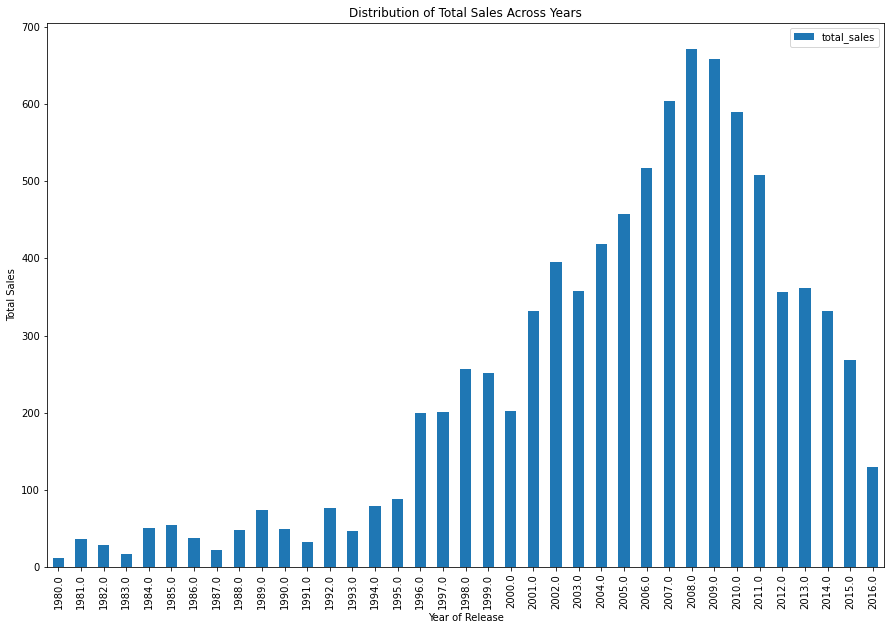

In [47]:
# Looks at total sales across year 

pd.pivot_table(game_data, index='year_of_release', values='total_sales', aggfunc='sum').plot(kind='bar', figsize=(15,10));

plt.xlabel('Year of Release') 
plt.ylabel('Total Sales') 
plt.title("Distribution of Total Sales Across Years");

**Interpretation of Graph**
* Sales peaked between 2007 and 2010.
* In order to inform an ad campaign for 2017, we will use recent date, looking at the last 6 years (2010-2016). 

In [48]:
# Pulls out data from the last 7 years

game_data_years = game_data.query('year_of_release >= 2010')

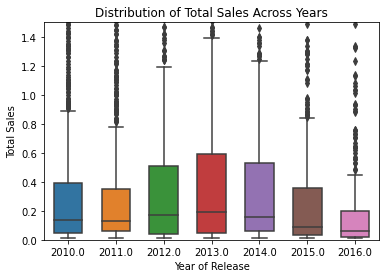

In [49]:
# Looks at distribution of total sales across year

sns.boxplot(x='year_of_release', y='total_sales', data=game_data_years, width=(0.6));

plt.xlabel('Year of Release') 
plt.ylabel('Total Sales') 
plt.title("Distribution of Total Sales Across Years");
plt.ylim(0, 1.5);
sns.set(rc={'figure.figsize':(10,5)}, font_scale=1.1, style='whitegrid')

**Interpretation of Graph**
* The average sales were similar across years, particularly 2011-2014. 
* There were high outlier sales in 2012 and 2013 in particular. 

In [50]:
# Groups total sales by platform

platform_sales = pd.pivot_table(game_data, index='platform_cat', values='total_sales', aggfunc='sum')

platform_sales.sort_values(by='total_sales', ascending=False)


,total_sales
platform_cat,
PS,3549.96
XBox,1372.13
Wii,973.37
DS,802.78
GB,567.31
3D,257.91
PC,255.79
NES,251.05
N64,218.01


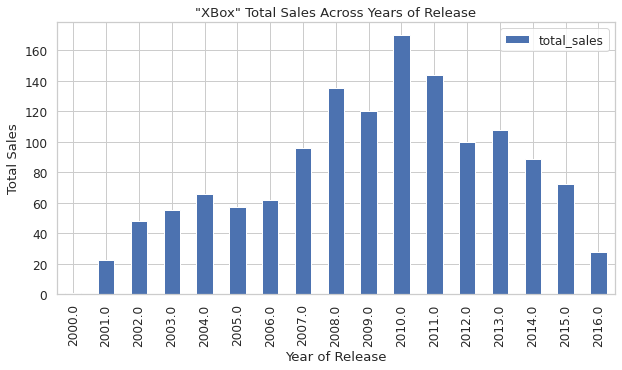

In [57]:
name = '"XBox"'

def game_func(name):
    game_data_ps = game_data.query(f'platform_cat == {name}')

    pd.pivot_table(game_data_ps, index=['year_of_release'], values='total_sales', aggfunc='sum').plot(kind='bar');
    plt.xlabel('Year of Release') 
    plt.ylabel('Total Sales') 
    plt.title(f'{name} Total Sales Across Years of Release');
game_func(name)

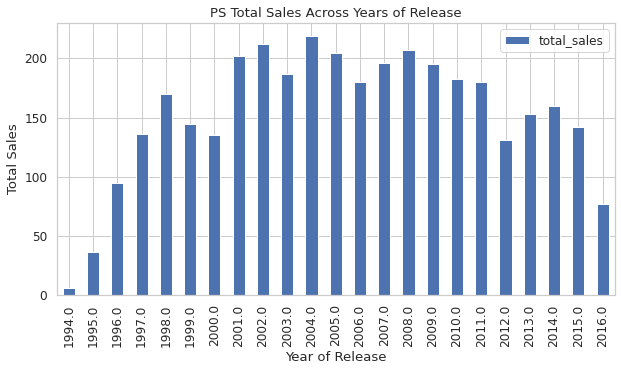

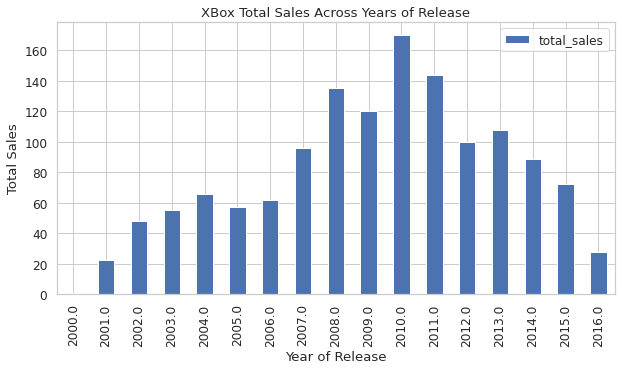

In [687]:
# Shows distribution of sales across year for the most profitable platforms 

game_data_ps = game_data.query('platform_cat == "PS"')

game_data_xbox = game_data.query('platform_cat == "XBox"')

pd.pivot_table(game_data_ps, index=['year_of_release'], values='total_sales', aggfunc='sum').plot(kind='bar');
plt.xlabel('Year of Release') 
plt.ylabel('Total Sales') 
plt.title('PS Total Sales Across Years of Release');

pd.pivot_table(game_data_xbox, index=['year_of_release'], values='total_sales', aggfunc='sum').plot(kind='bar');
plt.xlabel('Year of Release') 
plt.ylabel('Total Sales') 
plt.title('XBox Total Sales Across Years of Release');                                                                                                              

**Interpretation of Graph**
* Sales for the PS platform have stayed somewhat consistent between 1996 and 2015, peaking between 2001 and 2011. 
* Sales for the XBox platform rose between 2000 and 2007, peaking between 2008 and 2011. 

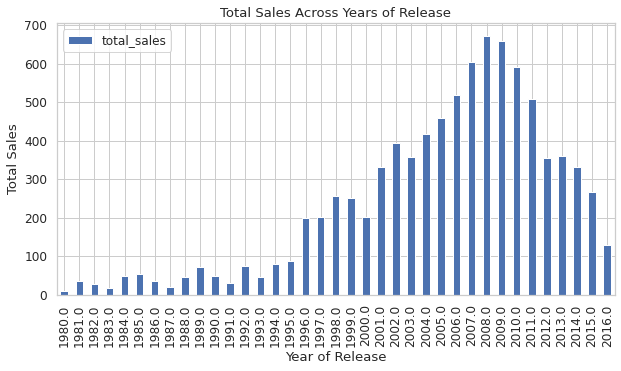

In [688]:
# Looks at distribution of total sales across years

pd.pivot_table(game_data, index='year_of_release', values='total_sales', aggfunc='sum').plot(kind='bar');
plt.xlabel('Year of Release') 
plt.ylabel('Total Sales') 
plt.title('Total Sales Across Years of Release');


**Interpretation of Graph**
* Total sales rose steadily until 2008, and then began to decline. 

In [689]:
# Refer to box above where I edited the query below to only include years 2010 and later per the feedback below.

# game_data_years = game_data.query('year_of_release > 1994')


In [690]:
# Looks at total sales by platform 

platform_sales_years = pd.pivot_table(game_data_years, index='platform_cat', values='total_sales', aggfunc='sum')

platform_sales_years.sort_values(by='total_sales', ascending=False)

,total_sales
platform_cat,
PS,1025.83
XBox,709.73
Wii,305.16
3D,257.81
DS,123.75
PC,121.96


In [691]:
# Looks at descriptive statistics 

pd.pivot_table(game_data_years, index='platform_cat', values='total_sales', aggfunc=['mean','median','min','max'])

,mean,median,min,max
,total_sales,total_sales,total_sales,total_sales
platform_cat,,,,
3D,0.503535,0.12,0.01,14.60
DS,0.244083,0.10,0.01,15.13
PC,0.254614,0.08,0.01,5.14
PS,0.454914,0.11,0.01,21.05
Wii,0.511156,0.18,0.01,10.12
XBox,0.765620,0.25,0.01,21.82


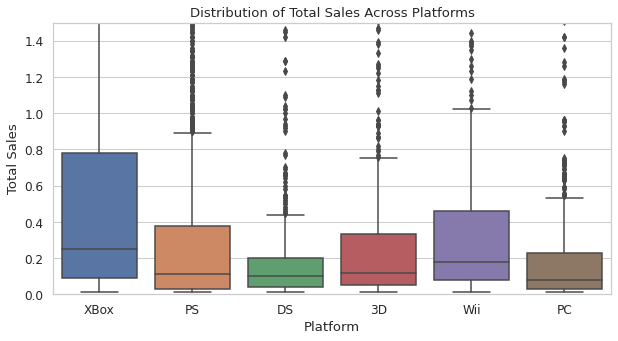

In [692]:
# Builds a box plot for the global sales across platforms 

sns.boxplot(x='platform_cat', y='total_sales', data=game_data_years, width=0.8);

plt.xlabel('Platform') 
plt.ylabel('Total Sales') 
plt.title("Distribution of Total Sales Across Platforms");
plt.ylim(0, 1.5);
sns.set(rc={'figure.figsize':(20,5)}, font_scale=1.1, style='whitegrid')

**Interpretation of Graph**
* Average sales were someone similar across most platforms, but the range of sales varied greatly, with some having very high outliers. 

In [693]:
# Looks specifically at a breakdown of games on one top-performing platform

game_data_xbox = game_data_years.query('platform_cat == "XBox"')

xbox_pivot = pd.pivot_table(game_data_xbox, index=['name','genre'], values='total_sales', aggfunc='sum')

xbox_pivot.sort_values(by='total_sales', ascending=False)

,,total_sales
name,genre,
Kinect Adventures!,Misc,21.82
Grand Theft Auto V,Action,21.74
Call of Duty: Modern Warfare 3,Shooter,14.73
Call of Duty: Black Ops,Shooter,14.62
Call of Duty: Black Ops II,Shooter,13.68
...,...,...
Winter Sports 3: The Great Tournament,Sports,0.01
John Daly's ProStroke Golf,Sports,0.01
Caladrius,Shooter,0.01


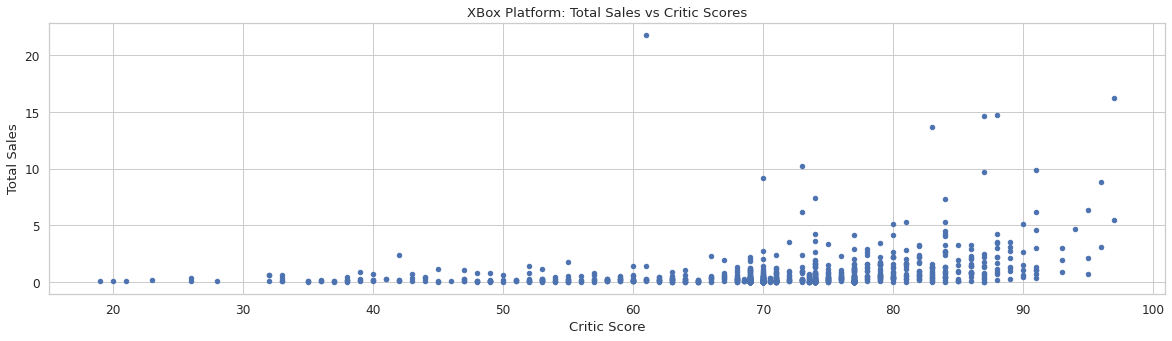

In [694]:
# Look at correlation between critic reviews and sales 

game_data_xbox.plot.scatter(x='critic_score', y='total_sales');

plt.xlabel('Critic Score') 
plt.ylabel('Total Sales') 
plt.title("XBox Platform: Total Sales vs Critic Scores");

In [695]:
# Look at correlation between critic reviews and sales for the XBox platform

game_data_xbox['total_sales'].corr(game_data_xbox['critic_score'])

0.29482474616036763

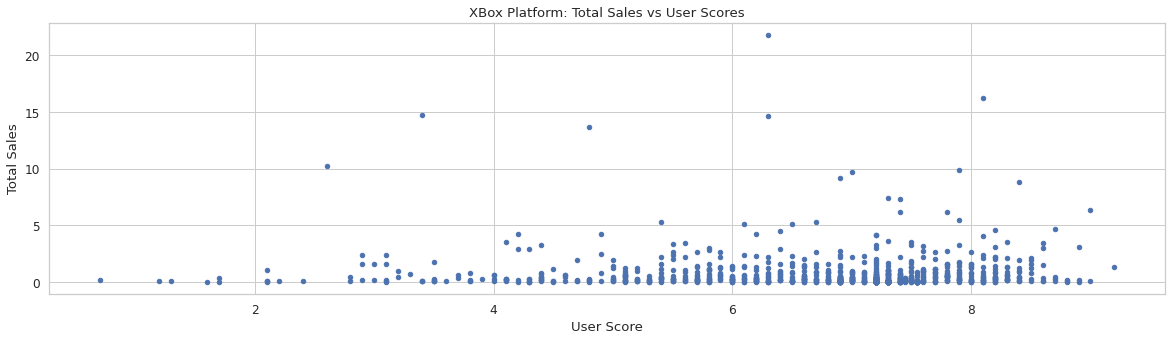

In [696]:
# Look at correlation between user reviews and sales 

game_data_xbox.plot.scatter(x='user_score', y='total_sales');

plt.xlabel('User Score') 
plt.ylabel('Total Sales') 
plt.title('XBox Platform: Total Sales vs User Scores');

In [697]:
# Look at correlation between user reviews and sales for the XBox platform

game_data_xbox['total_sales'].corr(game_data_xbox['user_score'])

-0.006094789384399529

**Interpretation of the Graphs**
* There is a moderate positive correlation between XBox sales and critic reviews (0.3).
* There is a week negative correlation between XBox sales and user reviews (-0.01).

In [698]:
# Looks specifically at a breakdown of games on one top-performing platform (PS3)

game_data_ps = game_data.query('platform_cat == "PS"')

PS_pivot = pd.pivot_table(game_data_ps, index=['name','genre'], values='total_sales', aggfunc='sum')

PS_pivot.sort_values(by='total_sales', ascending=False)

,,total_sales
name,genre,
Grand Theft Auto V,Action,33.67
Grand Theft Auto: San Andreas,Action,20.81
Call of Duty: Black Ops 3,Shooter,16.32
Grand Theft Auto: Vice City,Action,16.15
Gran Turismo 3: A-Spec,Racing,14.97
...,...,...
S.Y.K: Shinsetsu Saiyuuki Portable,Adventure,0.01
S.Y.K: Shinsetsu Saiyuuki,Adventure,0.01
Dramatical Murder Re:code,Adventure,0.01


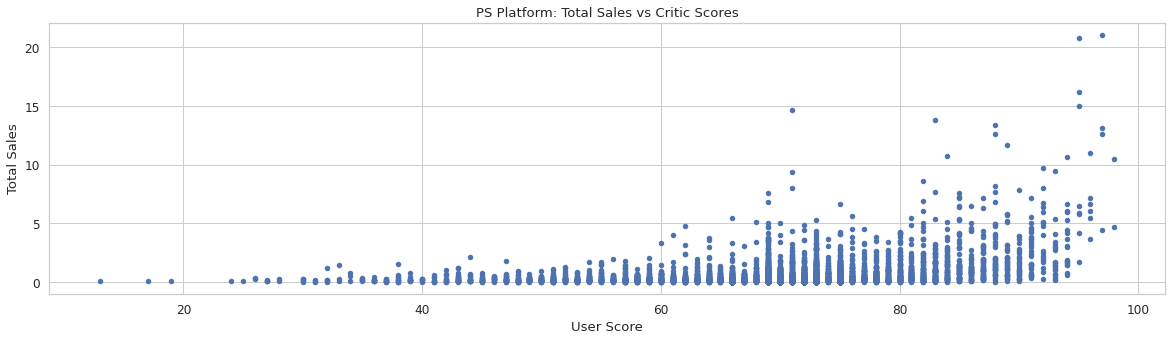

In [699]:
# Look at correlation between critic reviews and sales 

game_data_ps.plot.scatter(x='critic_score', y='total_sales');

plt.xlabel('User Score') 
plt.ylabel('Total Sales') 
plt.title('PS Platform: Total Sales vs Critic Scores');

In [700]:
# Look at correlation between critic reviews and sales for the PS Platform

game_data_ps['total_sales'].corr(game_data_ps['critic_score'])

0.3430485581885511

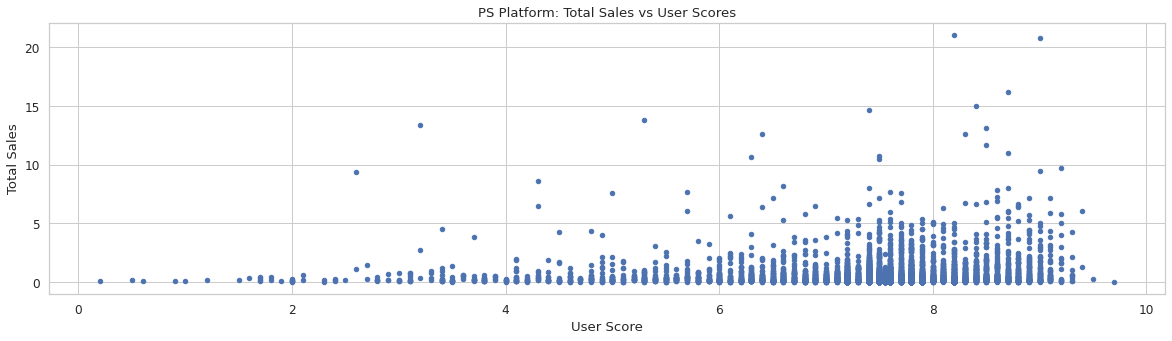

In [701]:
# Look at correlation between user reviews and sales 

game_data_ps.plot.scatter(x='user_score', y='total_sales');
plt.xlabel('User Score') 
plt.ylabel('Total Sales') 
plt.title('PS Platform: Total Sales vs User Scores');

In [702]:
# Look at correlation between user reviews and sales for the PS Platform

game_data_ps['total_sales'].corr(game_data_ps['user_score'])

0.06865831059231291

**Interpretation of the Graphs**

* There is a moderate positive correlation between PS sales and critic reviews (0.3).
* There is a weak positive correlation between PS sales and user reviews (0.07).

In [703]:
# Take a look at the general distribution of games by genre

game_data_genre = pd.pivot_table(game_data_years, index='genre', values='total_sales', aggfunc='sum')

game_data_genre.sort_values(by='total_sales', ascending=False)

,total_sales
genre,
Action,673.09
Shooter,479.74
Sports,328.39
Role-Playing,315.28
Misc,234.56
Racing,122.68
Platform,119.72
Fighting,81.59
Simulation,71.75


## Create user profiles

**Oberservations by region:**

***Platforms***
* The top platforms in North America and Europe were PS, XBox and Wi.
* The top platforms in Japan are PS, GS, and DB.      

***Genres***
* Sales across regions were highest for the genres role-playing, action, sports, platform and miscellaneous. 
* The top genres in North America are action, sports, shooter, platform, miscellaneous.          8
* The top genres in Europe are action, sports, shooter, racing and miscellaneous. 
* The top genres in Japan are role-playing, action, sports, platform and miscellaneous. 

***ESRB Ratings***
* Sales across regions were highest for films that weren't rated, films rated for "Everyone", films rated for "Teens", films rated "Mature", and films rated for everyone over age 10. 
* In North America, sales were highest for everyone, not rated, teens, mature and 10+.
* In Europe, sales were highest for everyone, not rated, mature, teen and 10+.
* In Japan, sales were highest for not rated, everyone, teen, mature and 10+. 

### Region: Stats by Platform

In [704]:
# Determines top platforms in North America

na_top_platforms = game_data_years.groupby('platform_cat')['na_sales'].sum()

na_top_platforms.sort_values(ascending=False)


platform_cat
XBox    427.30
PS      362.43
Wii     159.30
3D       82.65
DS       59.66
PC       39.07
Name: na_sales, dtype: float64

In [705]:
# Determines top platforms in Europe

eu_top_platforms = game_data_years.groupby('platform_cat')['eu_sales'].sum()

eu_top_platforms.sort_values(ascending=False)


platform_cat
PS      377.02
XBox    215.00
Wii      91.04
PC       68.82
3D       61.27
DS       28.06
Name: eu_sales, dtype: float64

In [706]:
# Determines top platforms in Japan

jp_top_platforms = game_data_years.groupby('platform_cat')['jp_sales'].sum()

jp_top_platforms.sort_values(ascending=False)


platform_cat
PS      140.06
3D      100.62
Wii      30.76
DS       27.90
XBox      5.80
PC        0.00
Name: jp_sales, dtype: float64

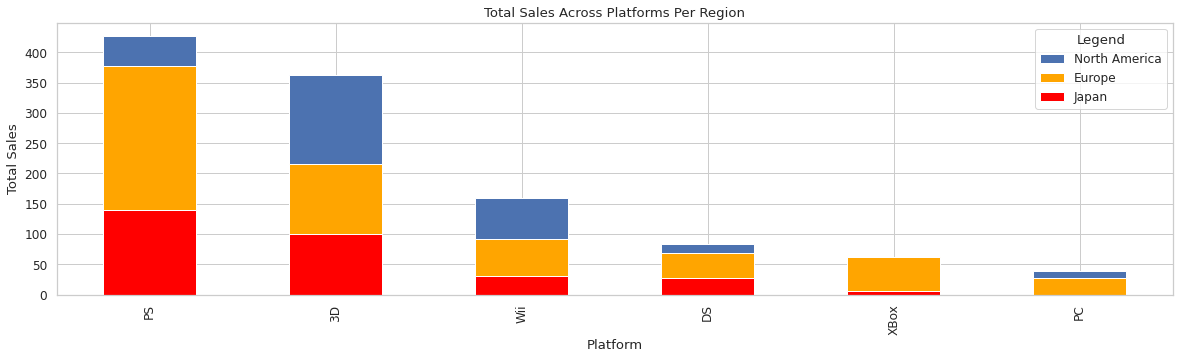

In [707]:
na_top_platforms.sort_values(ascending=False).plot(kind='bar');

eu_top_platforms.sort_values(ascending=False).plot(kind='bar', color = 'orange');

jp_top_platforms.sort_values(ascending=False).plot(kind='bar', color = 'red');

legend = plt.legend(['North America','Europe','Japan'], title = 'Legend')
plt.xlabel('Platform') 
plt.ylabel('Total Sales') 
plt.title('Total Sales Across Platforms Per Region');

### Region: Stats by Genre

In [708]:
# Determines top genre in North America

na_top_genre = game_data.groupby('genre')['na_sales'].sum()

na_top_genre.sort_values(ascending=False)


genre
Action          863.17
Sports          671.20
Shooter         584.83
Platform        444.44
Misc            399.57
Racing          356.86
Role-Playing    330.04
Fighting        220.51
Simulation      180.40
Puzzle          121.13
Adventure       101.52
Strategy         67.75
Name: na_sales, dtype: float64

In [709]:
# Determines top genre in Europe

eu_top_genre = game_data.groupby('genre')['eu_sales'].sum()

eu_top_genre.sort_values(ascending=False)

genre
Action          510.99
Sports          371.33
Shooter         314.52
Racing          234.49
Misc            210.60
Platform        199.39
Role-Playing    188.24
Simulation      113.35
Fighting         99.00
Adventure        63.20
Puzzle           49.78
Strategy         44.79
Name: eu_sales, dtype: float64

In [710]:
# Determines top genre in Japan

jp_top_genre = game_data.groupby('genre')['jp_sales'].sum()

jp_top_genre.sort_values(ascending=False)

genre
Role-Playing    353.39
Action          160.14
Sports          134.93
Platform        130.71
Misc            107.02
Fighting         87.28
Simulation       63.64
Puzzle           56.68
Racing           56.63
Adventure        52.24
Strategy         49.30
Shooter          38.68
Name: jp_sales, dtype: float64

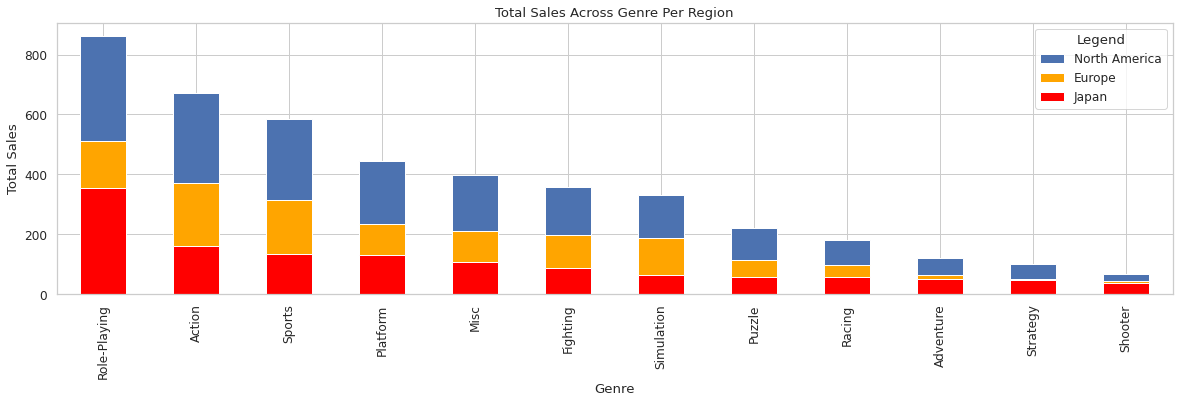

In [711]:
# Compares sales across genres for each region

na_top_genre.sort_values(ascending=False).plot(kind='bar');

eu_top_genre.sort_values(ascending=False).plot(kind='bar', color = 'orange');

jp_top_genre.sort_values(ascending=False).plot(kind='bar', color = 'red');

legend = plt.legend(['North America','Europe','Japan'], title = 'Legend')
plt.xlabel('Genre') 
plt.ylabel('Total Sales') 
plt.title('Total Sales Across Genre Per Region');

 ### Regions: Stats by ESRB Rating 

In [712]:
# Determines variation across ESRB ratings in North America

na_top_rating = game_data.groupby('rating')['na_sales'].sum()

na_top_rating.sort_values(ascending=False)


rating
E            1274.24
not rated    1225.84
T             747.60
M             742.89
E10+          345.50
K-A             2.56
EC              1.53
AO              1.26
RP              0.00
Name: na_sales, dtype: float64

In [713]:
# Determines variation across ESRB ratings in Europe

eu_top_rating = game_data.groupby('rating')['eu_sales'].sum()

eu_top_rating.sort_values(ascending=False)

rating
E            703.87
not rated    609.65
M            480.00
T            421.79
E10+         183.35
AO             0.61
K-A            0.27
EC             0.11
RP             0.03
Name: eu_sales, dtype: float64

In [714]:
# Determines variation across ESRB ratings in Japan

jp_top_rating = game_data.groupby('rating')['jp_sales'].sum()

jp_top_rating.sort_values(ascending=False)

rating
not rated    836.74
E            197.96
T            150.70
M             63.58
E10+          40.20
K-A            1.46
AO             0.00
EC             0.00
RP             0.00
Name: jp_sales, dtype: float64

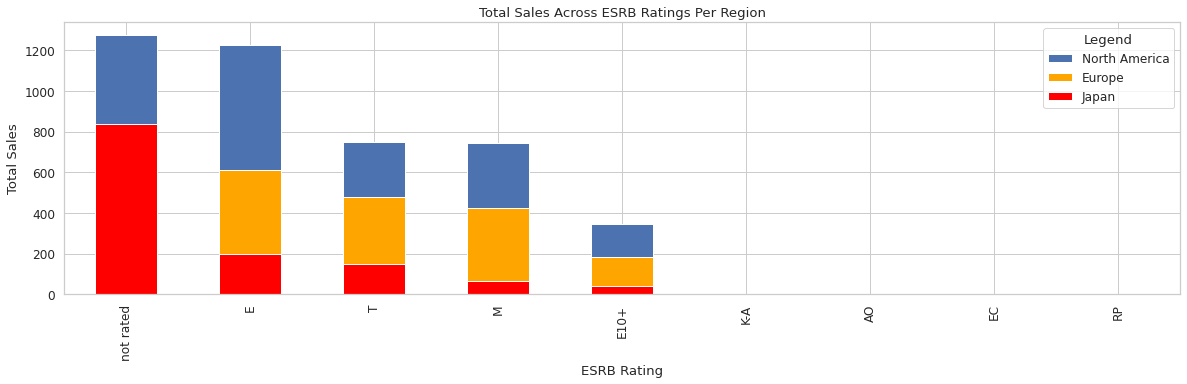

In [715]:
# Compares sales across ESRB ratings for each region

na_top_rating.sort_values(ascending=False).plot(kind='bar');

eu_top_rating.sort_values(ascending=False).plot(kind='bar', color = 'orange');

jp_top_rating.sort_values(ascending=False).plot(kind='bar', color = 'red');

legend = plt.legend(['North America','Europe','Japan'], title = 'Legend')
plt.xlabel('ESRB Rating') 
plt.ylabel('Total Sales') 
plt.title('Total Sales Across ESRB Ratings Per Region');

## Test hypotheses 


**Test the hypotheses around platform**

* **Null hypothesis**: Average user ratings of the Xbox One and PC platforms are the same.

* **Alternate hypothesis**: Average user ratings for the Action and Sports genres are different.

* **Statistical test** I will calculate a t-test for the two independent samples of the populations using scipy.stats.ttest_ind

* **Alpha** 0.05

In [716]:
# Segment out Xbox users and PC users

xbox_users = game_data_years.query('platform_cat == "XBox"')

PC_users = game_data_years.query('platform_cat == "PC"')


In [717]:
# Test the hypotheses

xbox_user_ratings = xbox_users['user_score'].values.tolist()
PC_user_ratings = PC_users['user_score'].values.tolist()
alpha = 0.05

results = st.ttest_ind(xbox_user_ratings, PC_user_ratings, equal_var = True)
print('p-value: ', results.pvalue)

if results.pvalue < alpha:
    print("We reject the null hypothesis.")
else:
    print("We can't reject the null hypothesis.")

p-value:  0.23700049883354138
We can't reject the null hypothesis.


**Test the hypotheses around genre**

* **Null hypothesis**: Average user ratings of the Action and Sports genres are different.

* **Alternate hypothesis**: Average user ratings for the Action and Sports genres are the same.

* **Statistical test** I will calculate a t-test for the two independent samples of the populations using scipy.stats.ttest_ind

* **Alpha** 0.05

In [718]:
# Segment out Action and Sports genres 

action_users = game_data_years.query('genre == "Action"')

sports_users = game_data_years.query('genre == "Sports"')

In [719]:
# Test the hypotheses

action_user_ratings = action_users['user_score'].values.tolist()
sports_user_ratings = sports_users['user_score'].values.tolist()
alpha = 0.05

results = st.ttest_ind(action_user_ratings, sports_user_ratings, equal_var = True)
print('p-value: ', results.pvalue)

if results.pvalue < alpha:
    print("We reject the null hypothesis.")
else:
    print("We can't reject the null hypothesis.")

p-value:  9.278781476503788e-20
We reject the null hypothesis.


## Conclusion

**Project Goal and Description**
The online store Ice sells video games all over the world and is planning an ad campaign for 2017. The goal of this project is to determine what factors influence the success of particular games. Potential factors include expert reviews, user reviews, genres, platforms and regions. 

**Project Plan**
This project will entail the following:
* Preparing the data for analysis, including checking for missing values, duplicates, appropriate data types, and conduct initial calculations (ex. total sales)
* Analyze data to get an initial view of game performance, including the number of games released in different years, sales across games and genre, sales across platforms, and sale performance over time.
* Determine sale performance, top platforms and top genres across regions. 
* Test the following hypotheses: 
    * Average user ratings of the Xbox One and PC platforms are the same.
    * Average user ratings for the Action and Sports genres are different.


**How the data was prepared:**
* ***Column Names***: The column names were changed to all lower case letters to be easier to read and analyze.
* ***Data Types***: 
    * The datatypes were changed for year of release (to float) and user score (to float). 
    * 14% of rows in the user score column are marked as "tbd". These rows have a similar distribution of data as the rest of the data set, including across years. My hypothesis is that these are games that are not yet rated, I replaced 'tbd' with an empty string, so that I could convert this column to a float type.
* ***Missing Data*** 
    * Rows with missing data in name, genre (only two rows) and year of release (1.6% of rows) were dropped. These rows were evenly distributed throughout the data and removing them did not impact the analysis. I took a look at the rows with missing data to identify any patterns, but the rows were evenly distributed throughout the data, indicating that they were most likely null due to input error. 
    * Missing data in the critic score and user score columns was filled in the with the median scores according to platform and genre.
    * Missing data in the ratings column was replaced with 'not rated'.
* ***Platform category***
    * Consolidated platform categories (ex. PS, XBox, Wii)
* ***Adding Total Sales***
    * Total sales across all regions per game was added to the table.
    

**Determining sale performance, top platforms and top genres**
* The top platforms with the most sales were PS and Xbox. 
* Out of the top-performing platforms, sales first emerged around 1994. Therefore, I segmented the data to elimate years before 1994 since we won't need them to compare the two top performing platforms. 
* While the average and median sales are generally similar, the platforms Wii, PS, and DS have the highest maximum  sales/outliers. 
* Total sales were impacted positively by critic and user score. 
* The top-performing genres are action, sports, miscellaneous, shooter and role-playing.
* North America and Europe had similar top platforms (PS, XBox and Wii), while PS, GS and DB led in Japan. 
* Sales per genre varied by region, although action, sports and micellaneous categories were common throughout.
* Sales per ESRB rating were similar across regions, with fils rated for everyone, not rated, rated mature, for teens and 10+ performing the best.


**Conclusions**
* The average user ratings of the Xbox One and PC platforms were significantly different from one another (we rejected the null hypothesis).
* Average user ratings of the Action and Sports genres were not statistically different from one another.
* The following factors impact sales: critic reviews, user reviews and genre. 